In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.drop("User ID",axis=1,inplace=True)

In [5]:
df["Gender"].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [6]:
df["Gender"]=df["Gender"].replace({"Male":0,"Female":1})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [8]:
features=df.drop("Purchased",axis=1)
target=df["Purchased"]

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.15, random_state=4)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [11]:
def mymodel(model):
    model.fit(xtrain,ytrain) #
    ypred=model.predict(xtest)
    # checking for overfitting underfitting
    print(f"Training score : {model.score(xtrain,ytrain)}")
    print(f"Testing score : {model.score(xtest,ytest)}")
    c=pd.DataFrame(confusion_matrix(ytest,ypred),
              index=["Not Purchase","Purchased"],
              columns=["Not Purchase","Purchased"])
    print(f"Confusion Matrix : \n{c}")
    print("Classification Report : \n",classification_report(ytest,ypred))
    return model
    

In [13]:
knn=mymodel(KNeighborsClassifier())

Training score : 0.8647058823529412
Testing score : 0.85
Confusion Matrix : 
              Not Purchase  Purchased
Not Purchase            41          5
Purchased                4         10
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.67      0.71      0.69        14

    accuracy                           0.85        60
   macro avg       0.79      0.80      0.80        60
weighted avg       0.85      0.85      0.85        60



In [14]:
# hyperparameter tuning
trainac=[]
testac=[]
for i in range(1,51,2):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain,ytrain)
    # checking training and testing score, for selecting
    # the neighbors with closest training and testing score
    trainac.append(model.score(xtrain,ytrain))
    testac.append(model.score(xtest,ytest))

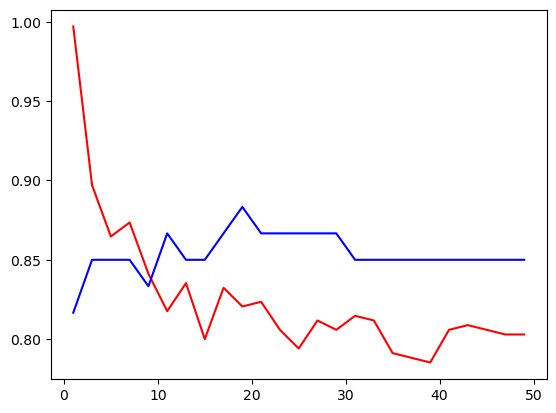

In [15]:
plt.plot(range(1,51,2),trainac,color="red")
plt.plot(range(1,51,2),testac,color="blue")
plt.show()

In [17]:
knn=mymodel(KNeighborsClassifier(n_neighbors=10))

Training score : 0.8264705882352941
Testing score : 0.8333333333333334
Confusion Matrix : 
              Not Purchase  Purchased
Not Purchase            44          2
Purchased                8          6
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        46
           1       0.75      0.43      0.55        14

    accuracy                           0.83        60
   macro avg       0.80      0.69      0.72        60
weighted avg       0.82      0.83      0.82        60

